TRAFFIC SIGN RECOGNITION SYSTEM

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 709.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 665.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 492.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 388.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 535.4 kB/s eta 0:00:00a 0:00:01


In [6]:
!pip install tensorflow


  Using cached tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.62.1-cp311-cp311-macosx_10_10_universal2.whl.metadata (4.0 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorflow_io_gcs_filesystem-0.36.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (

In [10]:
df = pd.read_csv("Meta.csv")
df

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


In [11]:
#To find the type of data attribute
df.dtypes

Path       object
ClassId     int64
ShapeId     int64
ColorId     int64
SignId     object
dtype: object

In [12]:
#To find the total number of elements from the data frame
df.size

215

In [13]:
#To find the dimensionality of dataframe 
df.shape  

(43, 5)

In [14]:
#To find the number of axes / array dimensions
df.ndim

2

In [15]:
#To check for missing values
df.isnull()

,Path,ClassId,ShapeId,ColorId,SignId
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [15]:
#To calculate the mean of the dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    column_mean = df[column].mean()
    print(f"{column}: {column_mean}")

ClassId: 21.0
ShapeId: 0.7906976744186046
ColorId: 0.5116279069767442


In [16]:
#To calculate the median of the dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    column_mean = df[column].median()
    print(f"{column}: {column_mean}")

ClassId: 21.0
ShapeId: 1.0
ColorId: 0.0


In [17]:
#To calculate the mode of the dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    column_mean = df[column].mode()
    print(f"{column}: {column_mean}")

ClassId: 0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
Name: ClassId, dtype: int64
ShapeId: 0    1
Name: ShapeId, dtype: int64
ColorId: 0    0
Name: ColorId, dtype: int64


In [18]:
#To calculate the standard deviation of the dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    column_mean = df[column].std()
    print(f"{column}: {column_mean}")

ClassId: 12.556538801224908
ShapeId: 0.8035083646965478
ColorId: 0.9353403511749032


<Axes: >

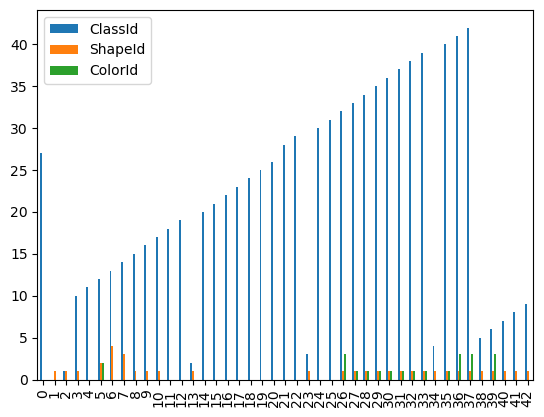

In [19]:
df.plot(kind = 'bar')

In [20]:
df_encoded = pd.get_dummies(df, columns=['ShapeId', 'ColorId'])

In [21]:
scaler = MinMaxScaler()
df_encoded[['ClassId']] = scaler.fit_transform(df_encoded[['ClassId']])

In [22]:
# Split the dataset into training and testing sets
X = df_encoded.drop('SignId', axis=1)  # Features
y = df_encoded['SignId']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# now we have to make use of two supervised classifier algorithms to build the model
# below we have made use of Random forests algorithms and Decision Tree algorithm

In [24]:
# building model using random forests algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Placeholder data and labels
num_samples = 1000
image_height = 28
image_width = 28
num_channels = 1
num_classes = 10

train_images = np.random.randn(num_samples, num_channels, image_height, image_width)
train_images_flattened = train_images.reshape(num_samples, -1)  # Flatten images
train_labels = np.random.randint(num_classes, size=num_samples)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Flatten the images for input to the Random Forest classifier
train_images_flattened = train_images.reshape(num_samples, -1)

# Train the Random Forest classifier
rf_classifier.fit(train_images_flattened, train_labels)

# Placeholder test data (replace with your own test data)
num_test_samples = 100
test_images = np.random.randn(num_test_samples, num_channels, image_height, image_width)
test_images_flattened = test_images.reshape(num_test_samples, -1)  # Flatten test images
test_labels = np.random.randint(num_classes, size=num_test_samples)

# Predictions on test data
predictions = rf_classifier.predict(test_images_flattened)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Random Forest Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

Random Forest Accuracy: 0.09
Confusion Matrix:
 [[2 0 0 2 1 0 1 2 2 0]
 [2 0 1 0 2 0 1 0 0 3]
 [1 0 0 4 3 3 1 1 0 1]
 [1 0 3 0 2 1 1 0 0 2]
 [4 1 0 0 1 0 1 2 1 0]
 [0 1 0 1 3 1 0 2 0 0]
 [0 0 0 1 2 0 2 1 0 0]
 [1 0 4 2 0 0 0 2 2 1]
 [1 0 0 1 4 0 0 3 1 1]
 [7 0 1 0 1 1 0 0 0 0]]


In [77]:
# building model using decison tree classifier algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
dt_classifier.fit(train_images_flattened, train_labels)

# Predictions on test data
dt_predictions = dt_classifier.predict(test_images_flattened)

# Calculate accuracy
dt_accuracy = accuracy_score(test_labels, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Calculate confusion matrix
dt_cm = confusion_matrix(test_labels, dt_predictions)
print("Confusion Matrix:\n", dt_cm)


Decision Tree Accuracy: 0.11
Confusion Matrix:
 [[2 0 2 1 0 2 1 0 1 1]
 [2 1 0 2 3 0 0 1 0 0]
 [2 0 3 4 1 1 2 0 1 0]
 [2 0 1 0 1 0 0 3 3 0]
 [1 0 1 0 2 1 2 2 1 0]
 [2 0 0 3 1 0 0 0 2 0]
 [1 1 1 1 0 0 1 1 0 0]
 [3 0 0 2 1 2 1 1 2 0]
 [0 0 2 2 2 1 1 0 0 3]
 [1 0 1 0 1 2 1 1 2 1]]


In [78]:
# COMPARISON OF TWO ALGORITHMS
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Random Forest Metrics
rf_accuracy = accuracy_score(test_labels, predictions)
rf_precision = precision_score(test_labels, predictions, average='macro')
rf_recall = recall_score(test_labels, predictions, average='macro')
rf_cm = confusion_matrix(test_labels, predictions)

# Decision Tree Metrics
dt_accuracy = accuracy_score(test_labels, dt_predictions)
dt_precision = precision_score(test_labels, dt_predictions, average='macro')
dt_recall = recall_score(test_labels, dt_predictions, average='macro')
dt_cm = confusion_matrix(test_labels, dt_predictions)

# Print metrics for Random Forest
print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("Confusion Matrix:\n", rf_cm)

# Print metrics for Decision Tree
print("\nDecision Tree Metrics:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("Confusion Matrix:\n", dt_cm)


Random Forest Metrics:
Accuracy: 0.09
Precision: 0.09307885097358781
Recall: 0.10159090909090909
Confusion Matrix:
 [[2 0 0 2 1 0 1 2 2 0]
 [2 0 1 0 2 0 1 0 0 3]
 [1 0 0 4 3 3 1 1 0 1]
 [1 0 3 0 2 1 1 0 0 2]
 [4 1 0 0 1 0 1 2 1 0]
 [0 1 0 1 3 1 0 2 0 0]
 [0 0 0 1 2 0 2 1 0 0]
 [1 0 4 2 0 0 0 2 2 1]
 [1 0 0 1 4 0 0 3 1 1]
 [7 0 1 0 1 1 0 0 0 0]]

Decision Tree Metrics:
Accuracy: 0.11
Precision: 0.14866161616161616
Recall: 0.10753968253968256
Confusion Matrix:
 [[2 0 2 1 0 2 1 0 1 1]
 [2 1 0 2 3 0 0 1 0 0]
 [2 0 3 4 1 1 2 0 1 0]
 [2 0 1 0 1 0 0 3 3 0]
 [1 0 1 0 2 1 2 2 1 0]
 [2 0 0 3 1 0 0 0 2 0]
 [1 1 1 1 0 0 1 1 0 0]
 [3 0 0 2 1 2 1 1 2 0]
 [0 0 2 2 2 1 1 0 0 3]
 [1 0 1 0 1 2 1 1 2 1]]
